In [1]:
pip install pandas

In [2]:
import pandas as pd 

data = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\projects\BondYeild_Prediction\newfredgraph.csv')
print(data.head())

         DATE    FF  INDPRO   CPI    VIX  DGS10
0  01-01-2000  5.45    4.80  2.11  23.20   6.66
1  01-02-2000  5.73    4.56  2.16  23.60   6.52
2  01-03-2000  5.85    4.74  2.45  22.72   6.26
3  01-04-2000  6.02    5.17  2.27  27.16   5.99
4  01-05-2000  6.27    4.84  2.38  26.37   6.44


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    296 non-null    object 
 1   FF      296 non-null    float64
 2   INDPRO  296 non-null    float64
 3   CPI     296 non-null    float64
 4   VIX     296 non-null    float64
 5   DGS10   296 non-null    float64
dtypes: float64(5), object(1)
memory usage: 14.0+ KB
None


In [4]:
print(data.describe())

               FF      INDPRO         CPI         VIX       DGS10
count  296.000000  296.000000  296.000000  296.000000  296.000000
mean     1.881081    0.681655    2.378851   19.905541    3.272027
std      2.008133    4.405529    1.142222    8.118895    1.306952
min      0.050000  -17.200000    0.600000   10.130000    0.620000
25%      0.140000   -1.062500    1.740000   14.077500    2.197500
50%      1.160000    1.900000    2.140000   17.820000    3.290000
75%      3.072500    3.090000    2.482500   23.457500    4.262500
max      6.540000   16.120000    6.640000   62.670000    6.660000


In [5]:
correlation_matrix = data.drop(columns= ['DATE']).corr()
print(correlation_matrix)

              FF    INDPRO       CPI       VIX     DGS10
FF      1.000000  0.134926  0.347424 -0.139731  0.752793
INDPRO  0.134926  1.000000  0.143670 -0.434660  0.148817
CPI     0.347424  0.143670  1.000000  0.026629  0.085390
VIX    -0.139731 -0.434660  0.026629  1.000000 -0.004733
DGS10   0.752793  0.148817  0.085390 -0.004733  1.000000


In [6]:
!pip install scikit-learn

In [7]:
#normalizing the input variables
from sklearn.preprocessing import MinMaxScaler

data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')

X= data[['FF','INDPRO','CPI','VIX']]
Y= data[['DGS10']]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Keeping the column names, converting back to dataframe
X_scaled_DF = pd.DataFrame(X_scaled, columns=X.columns)

#combining the data
N_data = pd.concat([data['DATE'], X_scaled_DF,Y], axis =1)

print(N_data.head())

N_data.to_csv('normalized_bonddata.csv', index = False)


        DATE        FF    INDPRO       CPI       VIX  DGS10
0 2000-01-01  0.832049  0.660264  0.250000  0.248763   6.66
1 2000-02-01  0.875193  0.653061  0.258278  0.256376   6.52
2 2000-03-01  0.893683  0.658463  0.306291  0.239627   6.26
3 2000-04-01  0.919877  0.671369  0.276490  0.324134   5.99
4 2000-05-01  0.958398  0.661465  0.294702  0.309098   6.44


In [8]:
print(N_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    296 non-null    datetime64[ns]
 1   FF      296 non-null    float64       
 2   INDPRO  296 non-null    float64       
 3   CPI     296 non-null    float64       
 4   VIX     296 non-null    float64       
 5   DGS10   296 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 14.0 KB
None


In [9]:
!python -m pip install --upgrade pip

In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [24]:
#splitting the dataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

data = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\projects\BondYeild_Prediction\normalized_bonddata.csv')

#splitting the data into training(2000-2020) and testing (2020-2024)
train_data = data[(data['DATE']>= '2000-01-01') & (data['DATE'] <= '2020-12-31')]
test_data = data[(data['DATE']>= '2020-01-01') & (data['DATE'] <= '2024-12-31')]

# seperating features and target
X_train = train_data[['FF','CPI','INDPRO','VIX']]
Y_train = train_data['DGS10']

X_test = test_data[['FF','CPI','INDPRO','VIX']]
Y_test = test_data['DGS10']

MODEL BUILDING

In [27]:
model = Sequential()
#input layer
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate = 0.0001), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=250, batch_size=64, validation_split=0.2, callbacks=[early_stopping])
#Predictions
Y_pred = model.predict(X_test)

#comparing the yields
comparison = pd.DataFrame({'Date': test_data['DATE'], 'Actual': Y_test,'Predicted':Y_pred.flatten()})
print(comparison)

#evaluating the model
loss = model.evaluate(X_test, Y_test)
print(f'Mean Squared Error on the test set: {loss}')

# Calcualting MAE
mae = mean_absolute_error(Y_test, Y_pred)
print(f'Mean Absolute Error on test set: {mae}')


Epoch 1/250


c:\Users\vinee\OneDrive\Desktop\projects\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 15.0452 - val_loss: 5.0610
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.0610 - val_loss: 5.0149
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.4881 - val_loss: 4.9697
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.9975 - val_loss: 4.9277
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.8258 - val_loss: 4.8919
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.4224 - val_loss: 4.8580
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.5239 - val_loss: 4.8255
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.8395 - val_loss: 4.7928
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.4611 - val_loss: 4.7616
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.9694 - val_loss: 4.7311
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 14.5548 - val_loss: 4.7000
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.0342 - val_lo

In [17]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------- ----------------------- 3.1/7.8 MB 15.4 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 16.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 15.1 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 17.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 21.1 MB/s eta 0:00:00
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
           Date  Actual  Predicted
240  2020-01-01    1.76   2.029529
241  2020-02-01    1.50   2.166848
242  2020-03-01    0.87   2.856669
243  2020-04-01    0.66   1.951748
244  2020-05-01    0.67   1.593031


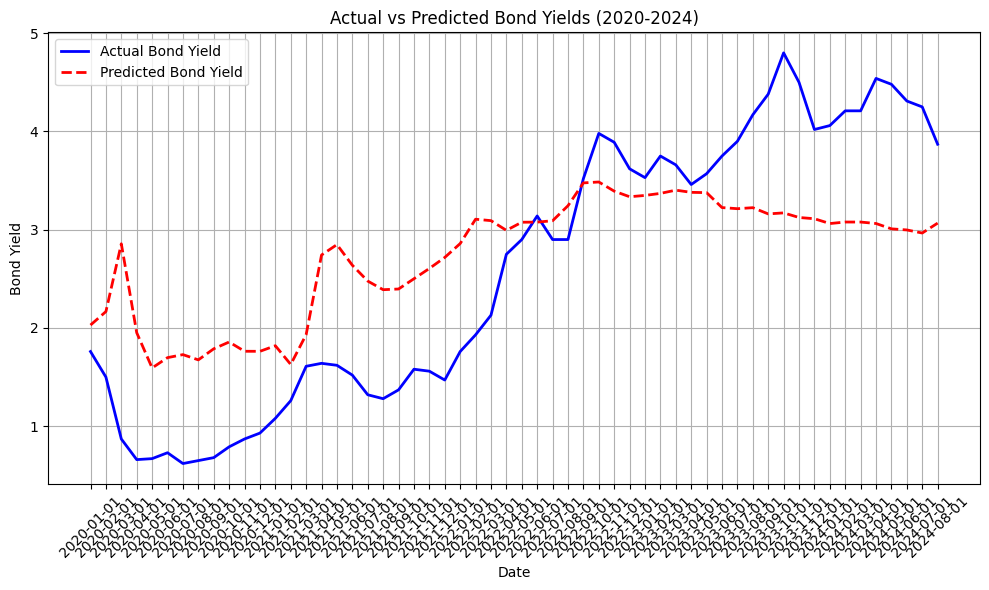

In [23]:
import matplotlib.pyplot as plt

#predictions on the test set (2020-2024)
Y_pred = model.predict(X_test)

#DataFrame to compare actual vs predicted values
comparison = pd.DataFrame({
    'Date': test_data['DATE'],
    'Actual': Y_test,
    'Predicted': Y_pred.flatten()
})

#Output the first few rows of the comparison
print(comparison.head())

# Plot the actual vs predicted bond yields
plt.figure(figsize=(10,6))
plt.plot(comparison['Date'], comparison['Actual'], label='Actual Bond Yield', color='blue', linewidth=2)
plt.plot(comparison['Date'], comparison['Predicted'], label='Predicted Bond Yield', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Bond Yield')
plt.title('Actual vs Predicted Bond Yields (2020-2024)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()